#  Problem Understanding

We want to:

Predict whether a loan will be approved or not.

Analyze patterns (gender, income, credit score, etc.).

This is a classification problem → output is binary: Approved (1) / Not Approved (0).

## 1. Import all the important libarires

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Collect Dataset

Source: Kaggle

File format: usually .csv.

Example: loan_data.csv

## 3. Load Dataset

In [5]:
# Load dataset
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# 4. Data Preprocessing

Handle Missing Values → fill or drop.

Encode Categorical Columns (like person_gender,person_education,loan_intent).

In [22]:

# Encode categorical columns
for col in ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file','loan_status']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features & Target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


# 5. Split the data into X and y

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Model Training

Try multiple models:

Logistic Regression (baseline)

Random Forest (better for mixed data)

XGBoost (powerful for tabular data)

Example (Random Forest):

In [49]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

## 7. Model Evaluation

Accuracy score

Confusion matrix (to check False Positives/Negatives)

Feature importance (which features matter most?)

In [53]:
# Prediction
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9118888888888889
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6990
           1       0.86      0.72      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000



## 8. Exploratory Data Analysis (EDA)

Approval % by Gender:

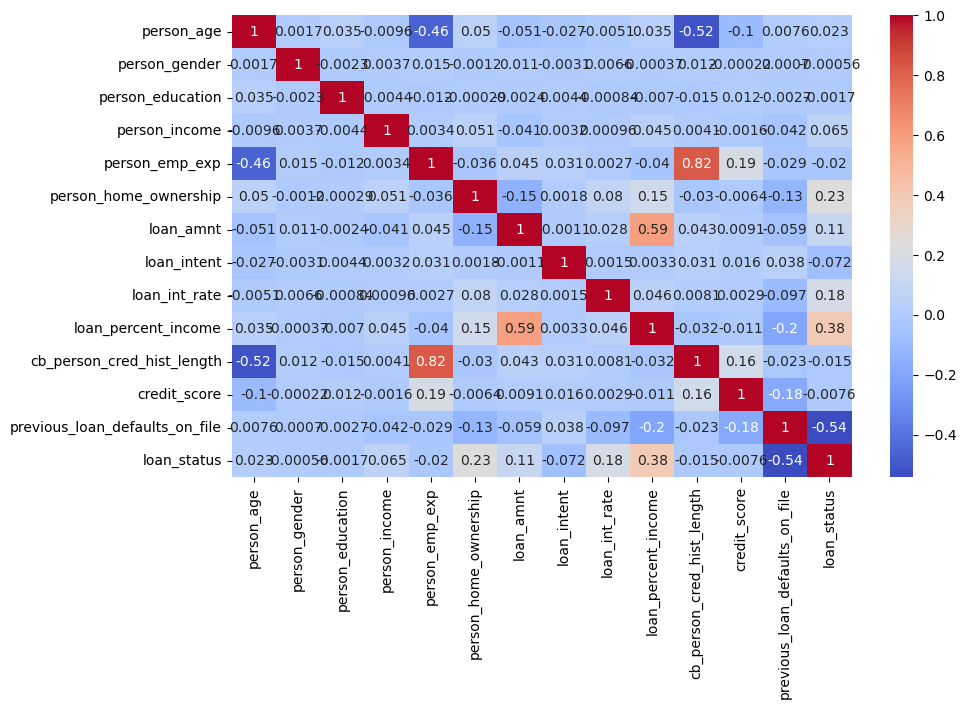

In [32]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

## 9. Insights & Visualization

Show approval % by gender/income.

Show correlation heatmap.

Show feature importance (e.g., Credit History most important).

## 🔹 Final Output You’ll Get

A trained ML model that predicts if a loan will be approved.

Visual insights like:

Loan approval % by gender.

Approval % by income level.

Correlation heatmaps.

Feature importance chart (credit history usually #1).